In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
k8_file_path = os.path.join('data', 'temp', 'baseline_rag_result_retrieved_faithfulness.csv')
k3_file_path = os.path.join('data', 'temp', 'baseline_rag_result_R3_retrieved_faithfulness.csv')

In [3]:
k8df = pd.read_csv(k8_file_path)
k8df.head(3)

,query,reference_contexts,reference_answer,reference_answer_by,query_by,response,retrieved_nodes,reranked_nodes,faithful_score,faithful_feedback
0,這門課希望學生從使用者變成什麼？,['各位同學大家好 我們來上課吧\n剛才只是用Google的VO3\n這個可以生成影片的人工...,理解者，甚至是創造者。,ai (gpt-5-mini),ai (gpt-5-mini),這門課希望學生從使用者變成理解者，甚至是創造者。,[{'id': '18773912-c8b5-4fb4-8d4b-cb4e38758012'...,[{'id': 'eba16e20-d000-4b3e-b05a-b1589f6b9fe9'...,1.0,YES
1,剛才用來生成倒數計時影片和讓人長出翅膀的影片是使用哪個工具？,['第一種\n如果你未來想要更深入人工智慧領域\n這門可絕對是很好的入門\n當然要完全掌握A...,答案：Google 的 VO3,ai (gpt-5-mini),ai (gpt-5-mini),剛才用來生成倒數計時影片和讓人長出翅膀的影片是使用Google的VO3。,[{'id': '18773912-c8b5-4fb4-8d4b-cb4e38758012'...,[{'id': 'c9b0c2ac-d7b7-4183-9bcd-6c3d57686b61'...,1.0,YES
2,哪個軟體被用來合成講師的聲音？,['也是VO3自己生成的\n他產生的影片是帶有聲音的\n那其他中文講課的聲音也通通都是合成的...,答案：Eleven Labs。,ai (gpt-5-mini),ai (gpt-5-mini),Eleven Labs這個軟體被用來合成講師的聲音。,[{'id': '18773912-c8b5-4fb4-8d4b-cb4e38758012'...,[{'id': 'c9b0c2ac-d7b7-4183-9bcd-6c3d57686b61'...,1.0,YES


In [4]:
k8df = k8df[['query', 'reference_answer', 'response', 'faithful_score', 'faithful_feedback']].copy()
k8df.columns = ['query', 'reference_answer', 'k8_response', 'k8_faithful_score', 'k8_faithful_feedback']
k8df.head(3)

,query,reference_answer,k8_response,k8_faithful_score,k8_faithful_feedback
0,這門課希望學生從使用者變成什麼？,理解者，甚至是創造者。,這門課希望學生從使用者變成理解者，甚至是創造者。,1.0,YES
1,剛才用來生成倒數計時影片和讓人長出翅膀的影片是使用哪個工具？,答案：Google 的 VO3,剛才用來生成倒數計時影片和讓人長出翅膀的影片是使用Google的VO3。,1.0,YES
2,哪個軟體被用來合成講師的聲音？,答案：Eleven Labs。,Eleven Labs這個軟體被用來合成講師的聲音。,1.0,YES


In [5]:
k3df = pd.read_csv(k3_file_path)
k3df.head(3)

,query,reference_contexts,reference_answer,reference_answer_by,query_by,response,retrieved_nodes,reranked_nodes,faithful_score,faithful_feedback
0,這門課希望學生從使用者變成什麼？,['各位同學大家好 我們來上課吧\n剛才只是用Google的VO3\n這個可以生成影片的人工...,理解者，甚至是創造者。,ai (gpt-5-mini),ai (gpt-5-mini),這門課希望學生從使用者變成創作者。,[{'id': '18773912-c8b5-4fb4-8d4b-cb4e38758012'...,[{'id': 'f1b8dce2-5b45-4ed8-b44d-0bf6e2306877'...,0.0,NO
1,剛才用來生成倒數計時影片和讓人長出翅膀的影片是使用哪個工具？,['第一種\n如果你未來想要更深入人工智慧領域\n這門可絕對是很好的入門\n當然要完全掌握A...,答案：Google 的 VO3,ai (gpt-5-mini),ai (gpt-5-mini),抱歉，無法提供該工具的資訊。,[{'id': '18773912-c8b5-4fb4-8d4b-cb4e38758012'...,[{'id': '18773912-c8b5-4fb4-8d4b-cb4e38758012'...,0.0,NO
2,哪個軟體被用來合成講師的聲音？,['也是VO3自己生成的\n他產生的影片是帶有聲音的\n那其他中文講課的聲音也通通都是合成的...,答案：Eleven Labs。,ai (gpt-5-mini),ai (gpt-5-mini),沒有提到任何軟體被用來合成講師的聲音。,[{'id': '18773912-c8b5-4fb4-8d4b-cb4e38758012'...,[{'id': '18773912-c8b5-4fb4-8d4b-cb4e38758012'...,1.0,YES


In [6]:
k3df = k3df[['query', 'reference_answer', 'response', 'faithful_score', 'faithful_feedback']].copy()
k3df.columns = ['query', 'reference_answer', 'k3_response', 'k3_faithful_score', 'k3_faithful_feedback']
k3df.head(3)

,query,reference_answer,k3_response,k3_faithful_score,k3_faithful_feedback
0,這門課希望學生從使用者變成什麼？,理解者，甚至是創造者。,這門課希望學生從使用者變成創作者。,0.0,NO
1,剛才用來生成倒數計時影片和讓人長出翅膀的影片是使用哪個工具？,答案：Google 的 VO3,抱歉，無法提供該工具的資訊。,0.0,NO
2,哪個軟體被用來合成講師的聲音？,答案：Eleven Labs。,沒有提到任何軟體被用來合成講師的聲音。,1.0,YES


In [7]:
df = pd.merge(k8df, k3df, how='left', on=['query', 'reference_answer'])
df.head(3)

,query,reference_answer,k8_response,k8_faithful_score,k8_faithful_feedback,k3_response,k3_faithful_score,k3_faithful_feedback
0,這門課希望學生從使用者變成什麼？,理解者，甚至是創造者。,這門課希望學生從使用者變成理解者，甚至是創造者。,1.0,YES,這門課希望學生從使用者變成創作者。,0.0,NO
1,剛才用來生成倒數計時影片和讓人長出翅膀的影片是使用哪個工具？,答案：Google 的 VO3,剛才用來生成倒數計時影片和讓人長出翅膀的影片是使用Google的VO3。,1.0,YES,抱歉，無法提供該工具的資訊。,0.0,NO
2,哪個軟體被用來合成講師的聲音？,答案：Eleven Labs。,Eleven Labs這個軟體被用來合成講師的聲音。,1.0,YES,沒有提到任何軟體被用來合成講師的聲音。,1.0,YES


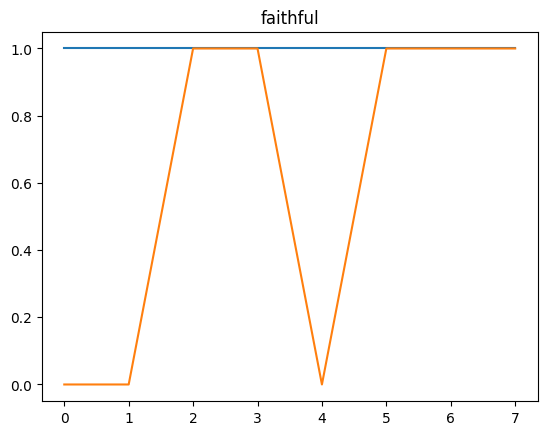

In [8]:
k8_scores = df['k8_faithful_score'].tolist()
k3_scores = df['k3_faithful_score'].tolist()
plt.title('faithful')
plt.plot(k8_scores)
plt.plot(k3_scores)